Build a random forest classifier to predict the risk of heart disease based on a dataset of patient information. The dataset contains 303 instances with 14 features, including age, sex, chest pain type, resting blood pressure, serum cholesterol, and maximum heart rate achieved.

In [4]:
!pip install gdown  # Installing the gdown library 

In [67]:
import gdown
import pandas as pd

# Define the file ID
file_id = "1bGoIE4Z2kG5nyh-fGZAJ7LH0ki3UfmSJ"

# Define the URL to access the file
url = f"https://drive.google.com/uc?id={file_id}"

# Read the file into a Pandas DataFrame
df = pd.read_csv(url)

# Now, 'df' contains your data, and you can work with it in your Jupyter Notebook
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [68]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       303 non-null    int64  
 1   sex       303 non-null    int64  
 2   cp        303 non-null    int64  
 3   trestbps  303 non-null    int64  
 4   chol      303 non-null    int64  
 5   fbs       303 non-null    int64  
 6   restecg   303 non-null    int64  
 7   thalach   303 non-null    int64  
 8   exang     303 non-null    int64  
 9   oldpeak   303 non-null    float64
 10  slope     303 non-null    int64  
 11  ca        303 non-null    int64  
 12  thal      303 non-null    int64  
 13  target    303 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 33.3 KB


In [69]:
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


Q1. Preprocess the dataset by handling missing values, encoding categorical variables, and scaling the
numerical features if necessary.

Answer--> Since there are not any missing values , calegorical data is already encoded, so we can probably skip this step for our dataset

In [70]:
## DIviding the dataset into Dependent and Independent varialble 

x = df.drop("target", axis = 1)
y = df.target
x.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2


In [19]:
y

0      1
1      1
2      1
3      1
4      1
      ..
298    0
299    0
300    0
301    0
302    0
Name: target, Length: 303, dtype: int64

Q2. Split the dataset into a training set (70%) and a test set (30%).

In [20]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=.30, random_state=42)

In [21]:
x_train.shape, y_train.shape

((212, 13), (212,))

Q3. Train a random forest classifier on the training set using 100 tree|s and a maximum depth of 10 for each
tree. Use the default values for other hyperparameters.

In [22]:
from sklearn.ensemble import RandomForestClassifier

In [23]:
clf = RandomForestClassifier(n_estimators=100, max_depth=10)

In [24]:
clf.fit(x_train, y_train)

RandomForestClassifier(max_depth=10)

Q4. Evaluate the performance of the model on the test set using accuracy, precision, recall, and F1 score.

In [28]:
from sklearn.metrics import accuracy_score, classification_report

y_pred=clf.predict(x_test)
y_pred

array([0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0,
       1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0,
       0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1,
       0, 0, 1])

In [33]:
print("Accuracy Score : ", accuracy_score(y_test, y_pred))
print()
print(classification_report(y_test, y_pred))

Accuracy Score :  0.8351648351648352

              precision    recall  f1-score   support

           0       0.82      0.80      0.81        41
           1       0.84      0.86      0.85        50

    accuracy                           0.84        91
   macro avg       0.83      0.83      0.83        91
weighted avg       0.83      0.84      0.83        91



Q5. Use the feature importance scores to identify the top 5 most important features in predicting heart
disease risk. Visualise the feature importances using a bar chart.

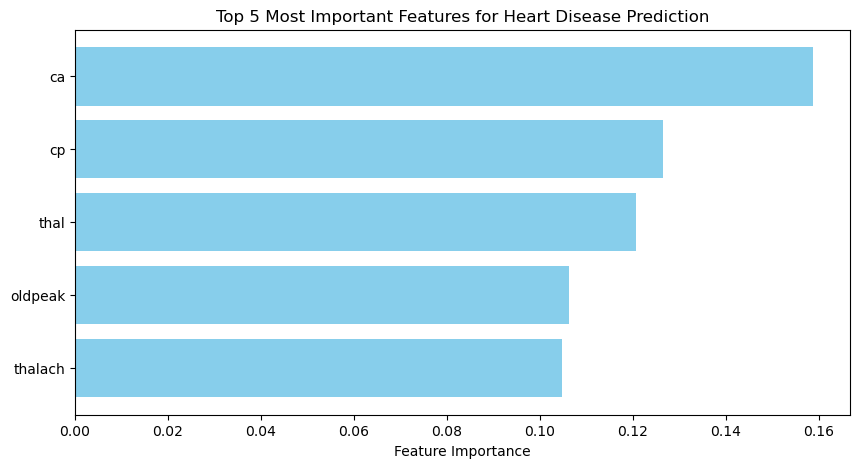

In [41]:
import pandas as pd
import matplotlib.pyplot as plt

# Get feature importances
feature_importances = clf.feature_importances_

# Create a DataFrame to store feature names and their importances
feature_importance_df = pd.DataFrame({'Feature': x.columns, 'Importance': feature_importances})

# Sort the DataFrame by importance in descending order
feature_importance_df = feature_importance_df.sort_values(by='Importance', ascending=False)

# Select the top 5 most important features
top_5_features = feature_importance_df.head(5)

# Visualize feature importances using a bar chart
plt.figure(figsize=(10, 5))
plt.barh(top_5_features['Feature'], top_5_features['Importance'], color='skyblue')
plt.xlabel('Feature Importance')
plt.title('Top 5 Most Important Features for Heart Disease Prediction')
plt.gca().invert_yaxis()  # Invert the y-axis for better visualization
plt.show()


Q6. Tune the hyperparameters of the random forest classifier using grid search or random search. Try different values of the number of trees, maximum depth, minimum samples split, and minimum samples leaf. Use 5-fold cross-validation to evaluate the performance of each set of hyperparameters.

In [42]:
## Hypeparameter Tuning

params={'max_depth':[3,5,10,None],
        'min_samples_split':[0,1,2,3],
        'n_estimators':[100,200,300],
        'criterion':['gini','entropy']
              }

In [47]:
from sklearn.model_selection import GridSearchCV

In [54]:
cv = GridSearchCV(clf, param_grid=params, cv = 5, verbose = 3 ,scoring='accuracy')

In [55]:
cv.fit(x_train, y_train)

Fitting 5 folds for each of 96 candidates, totalling 480 fits
[CV 1/5] END criterion=gini, max_depth=3, min_samples_split=0, n_estimators=100;, score=nan total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=3, min_samples_split=0, n_estimators=100;, score=nan total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=3, min_samples_split=0, n_estimators=100;, score=nan total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=3, min_samples_split=0, n_estimators=100;, score=nan total time=   0.0s
[CV 5/5] END criterion=gini, max_depth=3, min_samples_split=0, n_estimators=100;, score=nan total time=   0.0s
[CV 1/5] END criterion=gini, max_depth=3, min_samples_split=0, n_estimators=200;, score=nan total time=   0.0s
[CV 2/5] END criterion=gini, max_depth=3, min_samples_split=0, n_estimators=200;, score=nan total time=   0.0s
[CV 3/5] END criterion=gini, max_depth=3, min_samples_split=0, n_estimators=200;, score=nan total time=   0.0s
[CV 4/5] END criterion=gini, max_depth=3, min_samp

/opt/conda/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:378: FitFailedWarning: 
120 fits failed out of a total of 480.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
120 fits failed with the following error:
Traceback (most recent call last):
  File "/opt/conda/lib/python3.10/site-packages/sklearn/model_selection/_validation.py", line 686, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
  File "/opt/conda/lib/python3.10/site-packages/sklearn/ensemble/_forest.py", line 341, in fit
    self._validate_params()
  File "/opt/conda/lib/python3.10/site-packages/sklearn/base.py", line 570, in _validate_params
    validate_parameter_constraints(
  File "/opt/conda/lib/python3.10/site-packages/sklearn/ut

GridSearchCV(cv=5, estimator=RandomForestClassifier(max_depth=10),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [3, 5, 10, None],
                         'min_samples_split': [0, 1, 2, 3],
                         'n_estimators': [100, 200, 300]},
             scoring='accuracy', verbose=3)

Q7. Report the best set of hyperparameters found by the search and the corresponding performance
metrics. Compare the performance of the tuned model with the default model.

cv.best_params_

In [59]:
cv_y_pred = cv.predict(x_test)

In [61]:
print("Accuracy Score : ", accuracy_score(y_test, cv_y_pred))
print()
print(classification_report(y_test, cv_y_pred))

Accuracy Score :  0.8351648351648352

              precision    recall  f1-score   support

           0       0.84      0.78      0.81        41
           1       0.83      0.88      0.85        50

    accuracy                           0.84        91
   macro avg       0.84      0.83      0.83        91
weighted avg       0.84      0.84      0.83        91



We our both tunnedd or default models are giving same accuracy so we can choose any of both to predict our final model 

Q8. Interpret the model by analysing the decision boundaries of the random forest classifier. Plot the
decision boundaries on a scatter plot of two of the most important features. Discuss the insights and
limitations of the model for predicting heart disease risk.

In [83]:
# traning the model ATQ with tow most imp features  
x1 = df[['ca','cp']]
y1 = df.target

In [72]:
x1.head()

,ca,cp
0,0,3
1,0,2
2,0,1
3,0,1
4,0,0


In [75]:
x1_train, x1_test, y1_train, y1_test = train_test_split(x1, y1, test_size=.30, random_state=42)

In [76]:
x1_train.shape, x1_test.shape

((212, 2), (91, 2))

In [77]:
rf_clf = RandomForestClassifier(n_estimators=100, max_depth=10)

In [79]:
rf_clf.fit(x1_train, y1_train)

RandomForestClassifier(max_depth=10)

In [80]:
rf_clf.predict(x1_test)

array([0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1,
       1, 0, 1, 1, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 1, 1, 0,
       0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0,
       0, 1, 1])

/opt/conda/lib/python3.10/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


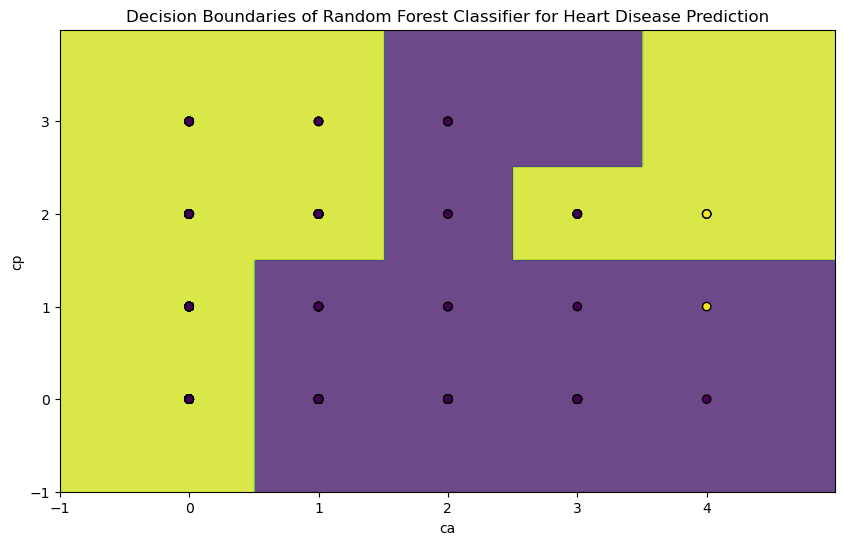

In [82]:
import numpy as np

# Select two most important features (modify based on your actual feature names)
feature1 = 'ca'
feature2 = 'cp'

# Generate data points for the two features
x_min, x_max = x1[feature1].min() - 1, x1[feature1].max() + 1
y_min, y_max = x1[feature2].min() - 1, x1[feature2].max() + 1

xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                     np.arange(y_min, y_max, 0.01))

# Predict classes for data points
Z = rf_clf.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Plot decision boundaries
plt.figure(figsize=(10, 6))
plt.contourf(xx, yy, Z, alpha=0.8)

# Plot scatter points of the two selected features
plt.scatter(x1[feature1], x1[feature2], c=y1, edgecolor='k')

# Set plot labels and title
plt.xlabel(feature1)
plt.ylabel(feature2)
plt.title('Decision Boundaries of Random Forest Classifier for Heart Disease Prediction')

# Show the plot
plt.show();
